# Countries Clustering

In [1]:
# Libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("viridis")
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataframe
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
print('Columns: '+str(df.shape[1])+' - Rows: '+str(df.shape[0]))

Columns: 10 - Rows: 167


In [4]:
# We also count with a dictionary for the features
dictionary = pd.read_csv('data-dictionary.csv')
dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [5]:
# The goal is to classify each country into a group, then to create a classification algorithm. Let's see a decripción of the data.
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


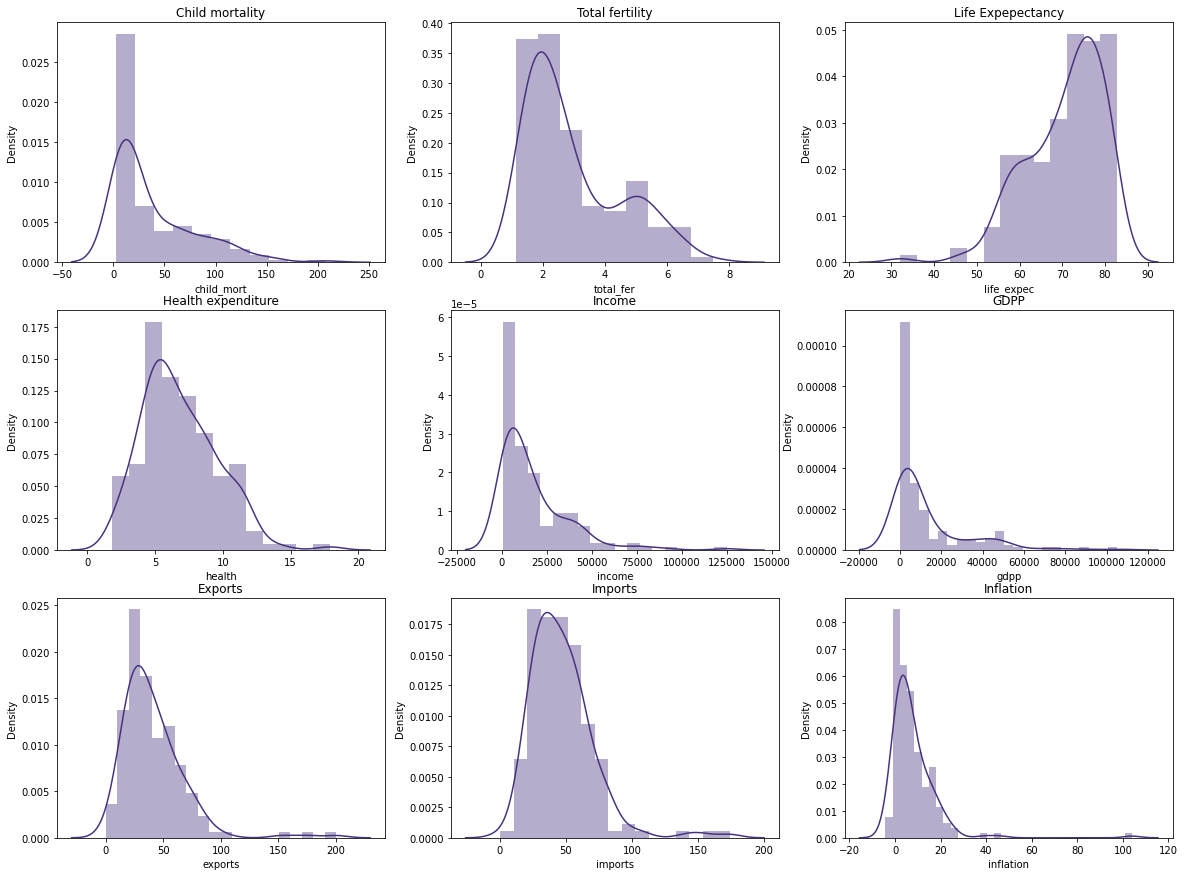

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
sns.distplot(df['child_mort'], ax=axs[0, 0])
axs[0, 0].set_title('Child mortality')
sns.distplot(df['health'], ax=axs[1, 0])
axs[1, 0].set_title('Health expenditure')
sns.distplot(df['exports'], ax=axs[2, 0])
axs[2, 0].set_title('Exports')


sns.distplot(df['total_fer'], ax=axs[0, 1])
axs[0, 1].set_title('Total fertility')
sns.distplot(df['income'], ax=axs[1, 1])
axs[1, 1].set_title('Income')
sns.distplot(df['imports'], ax=axs[2, 1])
axs[2, 1].set_title('Imports')

sns.distplot(df['life_expec'], ax=axs[0, 2])
axs[0, 2].set_title('Life Expectancy')
sns.distplot(df['gdpp'], ax=axs[1, 2])
axs[1, 2].set_title('GDPP')
sns.distplot(df['inflation'], ax=axs[2, 2])
axs[2, 2].set_title('Inflation')

plt.show()

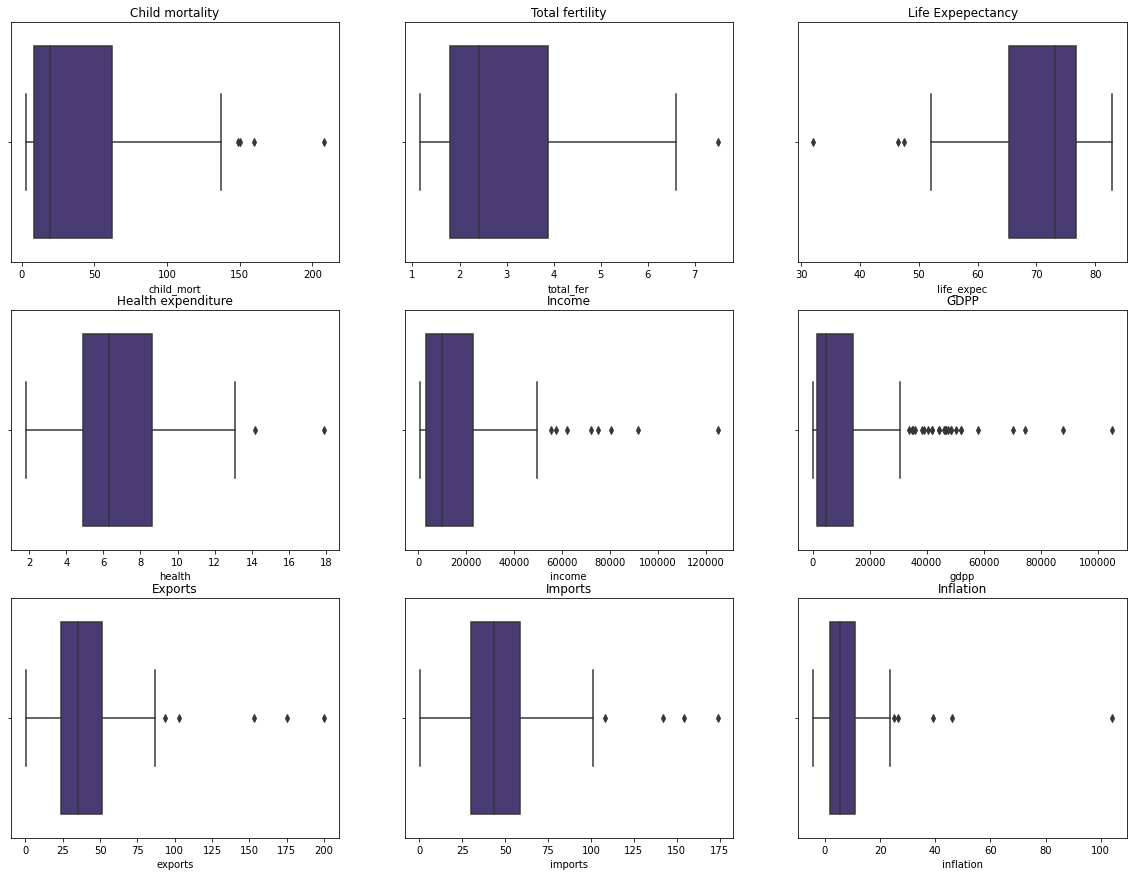

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
sns.boxplot(df['child_mort'], ax=axs[0, 0])
axs[0, 0].set_title('Child mortality')
sns.boxplot(df['health'], ax=axs[1, 0])
axs[1, 0].set_title('Health expenditure')
sns.boxplot(df['exports'], ax=axs[2, 0])
axs[2, 0].set_title('Exports')


sns.boxplot(df['total_fer'], ax=axs[0, 1])
axs[0, 1].set_title('Total fertility')
sns.boxplot(df['income'], ax=axs[1, 1])
axs[1, 1].set_title('Income')
sns.boxplot(df['imports'], ax=axs[2, 1])
axs[2, 1].set_title('Imports')

sns.boxplot(df['life_expec'], ax=axs[0, 2])
axs[0, 2].set_title('Life Expepectancy')
sns.boxplot(df['gdpp'], ax=axs[1, 2])
axs[1, 2].set_title('GDPP')
sns.boxplot(df['inflation'], ax=axs[2, 2])
axs[2, 2].set_title('Inflation')

plt.show()

In [18]:
# Let's take a look to outliers that look odd for certain features
print('Life Expectancy')
df.loc[df['life_expec'] < 50, ['country', 'life_expec']]

Life Expectancy


,country,life_expec
31,Central African Republic,47.5
66,Haiti,32.1
87,Lesotho,46.5


In [14]:
print('Child Mortality')
df.loc[df['child_mort'] > 150, ['country', 'child_mort']]


Child Mortality


,country,child_mort
66,Haiti,208.0
132,Sierra Leone,160.0


In [16]:
print('Inflation')
df.loc[df['inflation'] > 25, ['country', 'inflation']]

Inflation


,country,inflation
103,Mongolia,39.2
113,Nigeria,104.0
149,Timor-Leste,26.5
163,Venezuela,45.9


In [22]:
# Researching within the web we found that the values for life expectancy for these three countries seems unlike, we will replace for more realistic values
df.loc[df['country'] == 'Haiti', 'life_expec'] = 64
df.loc[df['country'] == 'Central African Republic', 'life_expec'] = 55
df.loc[df['country'] == 'Lesotho', 'life_expec'] = 55


## Clustering

In [23]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [24]:
# We will eliminate from our model the country, since can be considered and Id
X = df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### KMeans

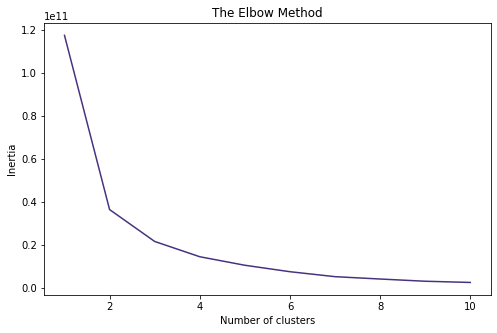

In [37]:
# Let's see how many clusters are recommended for this Dataset using the elbow method
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Sum of the distances graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### We will use 5 clusters for our model

In [40]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) 
y_kmeans = kmeans.fit_predict(X)

In [41]:
df['Cluster'] = pd.Series(y_kmeans, index=df.index)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,4
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,4
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


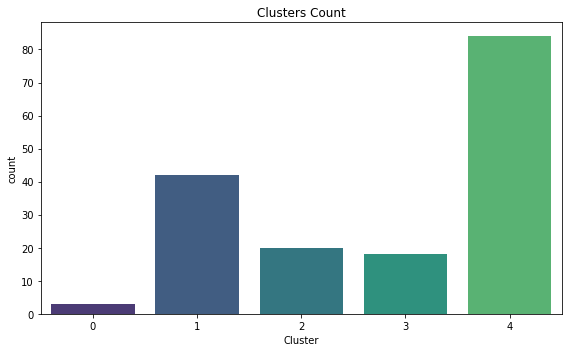

In [42]:
# Clusters Distribution
plt.figure(figsize=(8, 5))
sns.countplot(df['Cluster'])
plt.title('Clusters Count')
plt.tight_layout()
plt.show()

In [49]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'Cluster'],
      dtype='object')

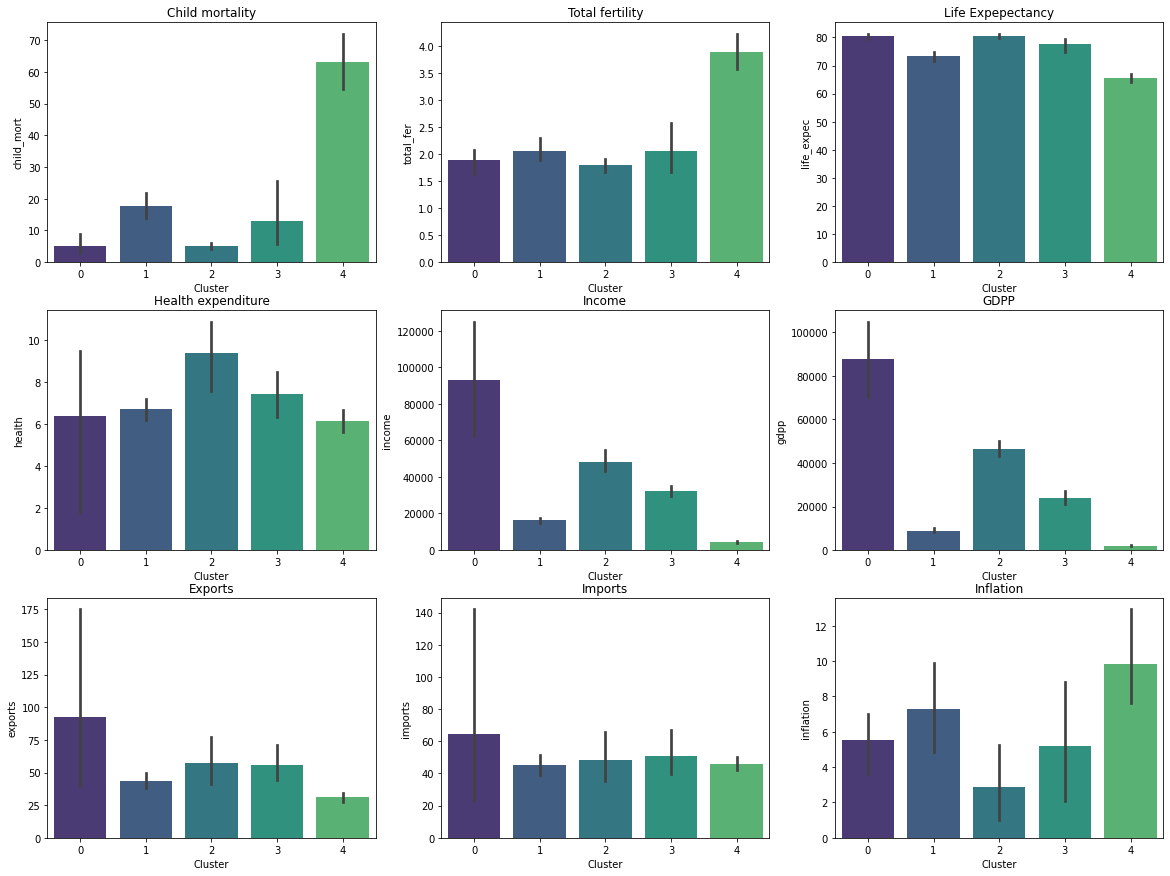

In [50]:
# Let's take a look at the features and theiir behavior for each cluster
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
sns.barplot(x=df['Cluster'], y=df['child_mort'], ax=axs[0, 0])
axs[0, 0].set_title('Child mortality')
sns.barplot(x=df['Cluster'], y=df['health'], ax=axs[1, 0])
axs[1, 0].set_title('Health expenditure')
sns.barplot(x=df['Cluster'], y=df['exports'], ax=axs[2, 0])
axs[2, 0].set_title('Exports')


sns.barplot(x=df['Cluster'], y=df['total_fer'], ax=axs[0, 1])
axs[0, 1].set_title('Total fertility')
sns.barplot(x=df['Cluster'], y=df['income'], ax=axs[1, 1])
axs[1, 1].set_title('Income')
sns.barplot(x=df['Cluster'], y=df['imports'], ax=axs[2, 1])
axs[2, 1].set_title('Imports')

sns.barplot(x=df['Cluster'], y=df['life_expec'], ax=axs[0, 2])
axs[0, 2].set_title('Life Expepectancy')
sns.barplot(x=df['Cluster'], y=df['gdpp'], ax=axs[1, 2])
axs[1, 2].set_title('GDPP')
sns.barplot(x=df['Cluster'], y=df['inflation'], ax=axs[2, 2])
axs[2, 2].set_title('Inflation')

plt.show()

## Insights
* Cluster 0: countries with old population and low births rates. They characterized for high exports, but also high imports, making them consumptions/production societies. Their GDP and income per person is greatly higher than other countries and their inflation rates are low. We will renamed this group "Highly developed countries"
* Cluster 1: countries with moderately high child mortality and relatively young populations with an stable birth rate. These societies are considered relatively poor that tend to import and import at the same level. Their income per person and GDP is low and their inflation high, making them prom to economical crisis. We will renamed this group "Underdeveloped countries"
* Cluster 2: Old population countries with the lowest birthrate, and characteristic often found in ancient countries like european nations. With a moderately high income and controlled inflation, tend to expend a great deal of monety on health a feature found on "Wellfare states". We will renamed this group "Developed countries"
* Cluster 3: countries with and increasing quality of life: high life expectancy, low child mortality and average birthrate. Their income and GDP is average and inflation very variable with imports and export levels very similar. We will renamed this group "Emerging countries".
* Cluster 4: this groups the biggest amount of countries, with the worsts living conditions: high child mortality and low life expectancy. The birth rate is greatly higher than other countries, almost 4 kids per family, the double of the rest of the groups. Their income and GDP is the lowest of all, and tend to import more than their produce. This are countries in economical crisis with high inlation rates. We will renamed this group "Highly underdeveloped countries".

In [51]:
df['Cluster'] = df['Cluster'].replace([0, 1, 2, 3, 4], ['Highly developed countries', 'Underdeveloped countries', 'Developed countries', 
                                                        'Emerging countries', 'Highly underdeveloped countries'])
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Highly underdeveloped countries
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Highly underdeveloped countries
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Underdeveloped countries
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Highly underdeveloped countries
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Underdeveloped countries


In [55]:
print('Highly developed countries')
df.loc[df['Cluster'] == 'Highly developed countries', ['country', 'Cluster']] 

Highly developed countries


,country,Cluster
91,Luxembourg,Highly developed countries
114,Norway,Highly developed countries
123,Qatar,Highly developed countries


In [56]:
print('Developed countries')
df.loc[df['Cluster'] == 'Developed countries', ['country', 'Cluster']] 

Developed countries


,country,Cluster
7,Australia,Developed countries
8,Austria,Developed countries
15,Belgium,Developed countries
23,Brunei,Developed countries
29,Canada,Developed countries
44,Denmark,Developed countries
53,Finland,Developed countries
54,France,Developed countries
58,Germany,Developed countries
68,Iceland,Developed countries


In [57]:
print('Emerging countries')
df.loc[df['Cluster'] == 'Emerging countries', ['country', 'Cluster']] 

Emerging countries


,country,Cluster
10,Bahamas,Emerging countries
11,Bahrain,Emerging countries
42,Cyprus,Emerging countries
43,Czech Republic,Emerging countries
49,Equatorial Guinea,Emerging countries
60,Greece,Emerging countries
74,Israel,Emerging countries
75,Italy,Emerging countries
89,Libya,Emerging countries
98,Malta,Emerging countries


In [58]:
print('Underdeveloped countries')
df.loc[df['Cluster'] == 'Underdeveloped countries', ['country', 'Cluster']] 

Underdeveloped countries


,country,Cluster
2,Algeria,Underdeveloped countries
4,Antigua and Barbuda,Underdeveloped countries
5,Argentina,Underdeveloped countries
9,Azerbaijan,Underdeveloped countries
13,Barbados,Underdeveloped countries
14,Belarus,Underdeveloped countries
21,Botswana,Underdeveloped countries
22,Brazil,Underdeveloped countries
24,Bulgaria,Underdeveloped countries
33,Chile,Underdeveloped countries


In [59]:
print('Highly underdeveloped countries')
df.loc[df['Cluster'] == 'Highly underdeveloped countries', ['country', 'Cluster']] 

Highly underdeveloped countries


,country,Cluster
0,Afghanistan,Highly underdeveloped countries
1,Albania,Highly underdeveloped countries
3,Angola,Highly underdeveloped countries
6,Armenia,Highly underdeveloped countries
12,Bangladesh,Highly underdeveloped countries
...,...,...
161,Uzbekistan,Highly underdeveloped countries
162,Vanuatu,Highly underdeveloped countries
164,Vietnam,Highly underdeveloped countries
165,Yemen,Highly underdeveloped countries
